In [1]:
# Up to this point we have not used R, but now we can no longer avoid that
# The arules pachage for R is the best around, by any industry standard# This notebook uses 
# pure R code--the kernel for R should be installed

library('mlbench')

data(Zoo) # load up an R DataFrame
head(Zoo) # print part of it from R

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
aardvark,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,FALSE,FALSE,TRUE,mammal
antelope,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal
bass,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,0,TRUE,FALSE,FALSE,fish
bear,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,FALSE,FALSE,TRUE,mammal
boar,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal
buffalo,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal


## Using R with apriori
Using the r magics in iPython is a much easier and more consistent use of R coding.

In [3]:
# load up some zoo data
data(Zoo)
library(arules)

# make the "legs" attirbute binary
has_legs <- Zoo["legs"]>0
Zoo[["legs"]] <- as.factor(has_legs)

# convert to transactions, where column indicates the output of the attribute
# so "hair" as an attribute would generate two columns -> "hair=TRUE and hair=FALSE"
trans <- as(Zoo, "transactions")

# Now that we have transactions, its time to run the apriori algorithm
isets <- apriori(trans, parameter=list(target="frequent", support=0.5))

# sort it and display some of the frequent itemsets from apriori
isets <- sort(isets, by="support") 
inspect(head(isets, n=10))
length(isets)

Loading required package: Matrix

Attaching package: ‘Matrix’

The following objects are masked from ‘package:base’:

    crossprod, tcrossprod


Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    %in%, write




Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen
        0.8    0.1    1 none FALSE            TRUE     0.5      1     10
            target   ext
 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

apriori - find association rules with the apriori algorithm
version 4.21 (2004.05.09)        (c) 1996-2004   Christian Borgelt
set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[24 item(s), 101 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [21 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
   items         support
1  {backbone}  0.8217822
2  {breathes}  0.7920792
3  {legs=TRUE} 0.7722772
4  {tail}      0.7425743
5  {backbone,           
    tail}      0.7326733
6  {breathes,           
 

[1] 21

In [4]:
# Do same thing, getting only the maximal sets
is_max <- isets[is.maximal(isets)]
inspect(head(sort(is_max, by="support")))
length(is_max)

  items         support
1 {eggs}      0.5841584
2 {predator}  0.5544554
3 {backbone,           
   breathes,           
   legs=TRUE,          
   tail}      0.5544554
4 {toothed,            
   backbone,           
   tail}      0.5148515


[1] 4

In [5]:
# generate some rules from the frequent itemsets
rules <- apriori(trans, parameter=list(support=.5, confidence=.9))

inspect(head(rules, n=10))

# print out measures of rule quality
quality(head(rules))


Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.9    0.1    1 none FALSE            TRUE     0.5      1     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

apriori - find association rules with the apriori algorithm
version 4.21 (2004.05.09)        (c) 1996-2004   Christian Borgelt
set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[24 item(s), 101 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [14 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
   lhs            rhs           support confidence     lift
1  {toothed}   => {backbone}  0.6039604  1.0000000 1.216867
2  {legs=TRUE} => {breathes}  0.7227723  0.9358974 1.181571
3  {breathes}  => {legs=TRUE} 0.7227723  0

,support,confidence,lift
1,0.6039604,1,1.216867
2,0.7227723,0.9358974,1.181571
3,0.7227723,0.9125,1.181571
4,0.7326733,0.9866667,1.200643
5,0.5148515,1,1.216867
6,0.5643564,1,1.2625


In [6]:
# sort out the rules and print additional "interest" measures
rules <- sort(rules, by="lift")
inspect(head(rules, n=10))
interestMeasure(rules[1:10], method=c("phi", "gini"), trans=trans)

   lhs            rhs           support confidence     lift
1  {legs=TRUE,                                             
    tail}      => {breathes}  0.5643564  1.0000000 1.262500
2  {backbone,                                              
    legs=TRUE} => {breathes}  0.6336634  1.0000000 1.262500
3  {backbone,                                              
    legs=TRUE,                                             
    tail}      => {breathes}  0.5544554  1.0000000 1.262500
4  {toothed}   => {backbone}  0.6039604  1.0000000 1.216867
5  {toothed,                                               
    tail}      => {backbone}  0.5148515  1.0000000 1.216867
6  {breathes,                                              
    tail}      => {legs=TRUE} 0.5643564  0.9344262 1.209962
7  {backbone,                                              
    breathes,                                              
    tail}      => {legs=TRUE} 0.5544554  0.9333333 1.208547
8  {backbone,                           

,phi,gini
1,0.5831439,0.1120077
2,0.6738353,0.1495561
3,0.5715476,0.1075973
4,0.5750851,0.09687286
5,0.4797344,0.06741236
6,0.4774846,0.08019151
7,0.4645913,0.07591923
8,0.5436464,0.1039544
9,0.731762,0.1568475
10,0.5221857,0.07987075


Loading required package: grid

Attaching package: ‘arulesViz’

The following object is masked from ‘package:base’:

    abbreviate



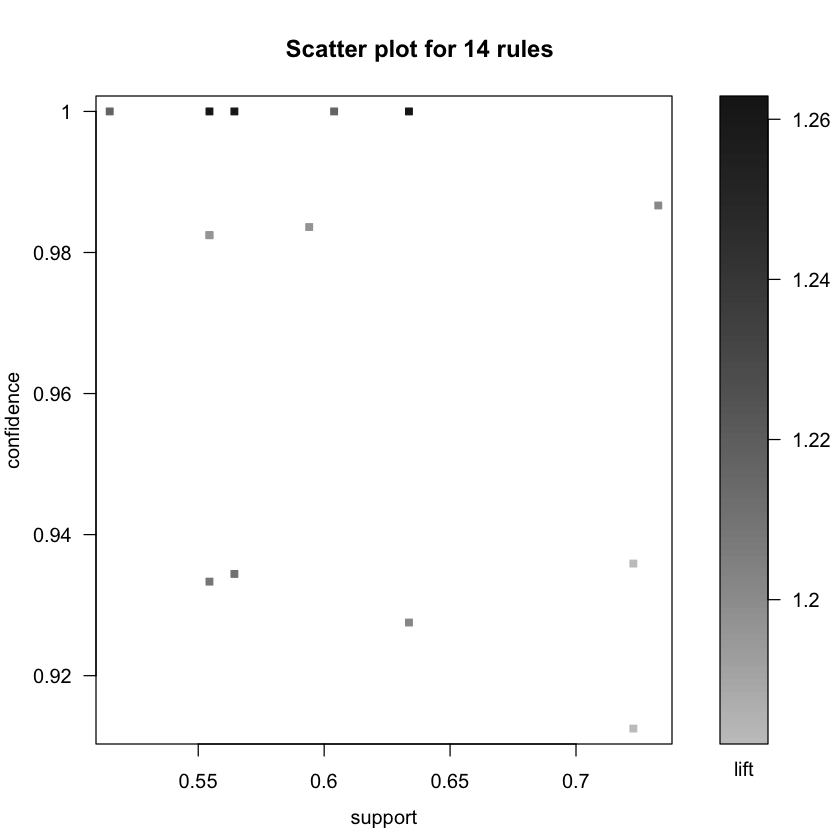

In [7]:
# visualize the different rules, 
#  the first visualization might take some time to render properly
library(arulesViz)
plot(rules)

   lhs            rhs           support confidence     lift
1  {legs=TRUE,                                             
    tail}      => {breathes}  0.5643564  1.0000000 1.262500
2  {backbone,                                              
    legs=TRUE} => {breathes}  0.6336634  1.0000000 1.262500
3  {backbone,                                              
    legs=TRUE,                                             
    tail}      => {breathes}  0.5544554  1.0000000 1.262500
4  {toothed}   => {backbone}  0.6039604  1.0000000 1.216867
5  {toothed,                                               
    tail}      => {backbone}  0.5148515  1.0000000 1.216867
6  {breathes,                                              
    tail}      => {legs=TRUE} 0.5643564  0.9344262 1.209962
7  {backbone,                                              
    breathes,                                              
    tail}      => {legs=TRUE} 0.5544554  0.9333333 1.208547
8  {backbone,                           

[1] 14

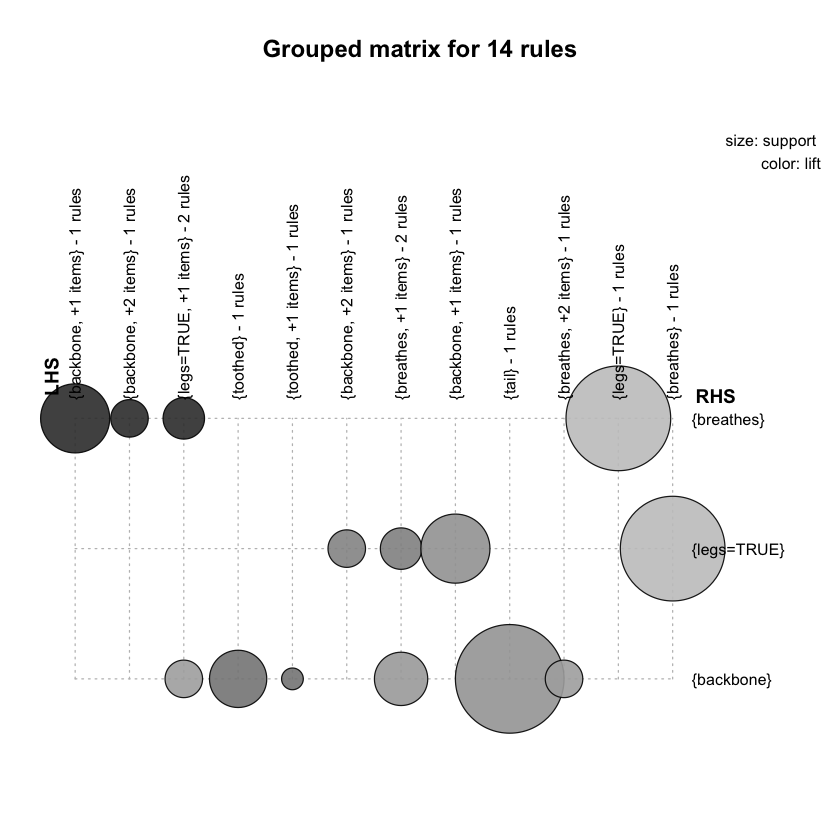

In [8]:
# a great plot
plot(rules, method="grouped")
inspect(rules)
length(rules)

   lhs             rhs                support confidence     lift
1  {Class=2nd,                                                   
    Age=Child}  => {Survived=Yes} 0.010904134  1.0000000 3.095640
2  {Class=2nd,                                                   
    Sex=Female,                                                  
    Age=Child}  => {Survived=Yes} 0.005906406  1.0000000 3.095640
3  {Class=1st,                                                   
    Sex=Female} => {Survived=Yes} 0.064061790  0.9724138 3.010243
4  {Class=1st,                                                   
    Sex=Female,                                                  
    Age=Adult}  => {Survived=Yes} 0.063607451  0.9722222 3.009650
5  {Class=2nd,                                                   
    Sex=Female} => {Survived=Yes} 0.042253521  0.8773585 2.715986
6  {Class=Crew,                                                  
    Sex=Female} => {Survived=Yes} 0.009086779  0.8695652 2.691861
7  {Class=

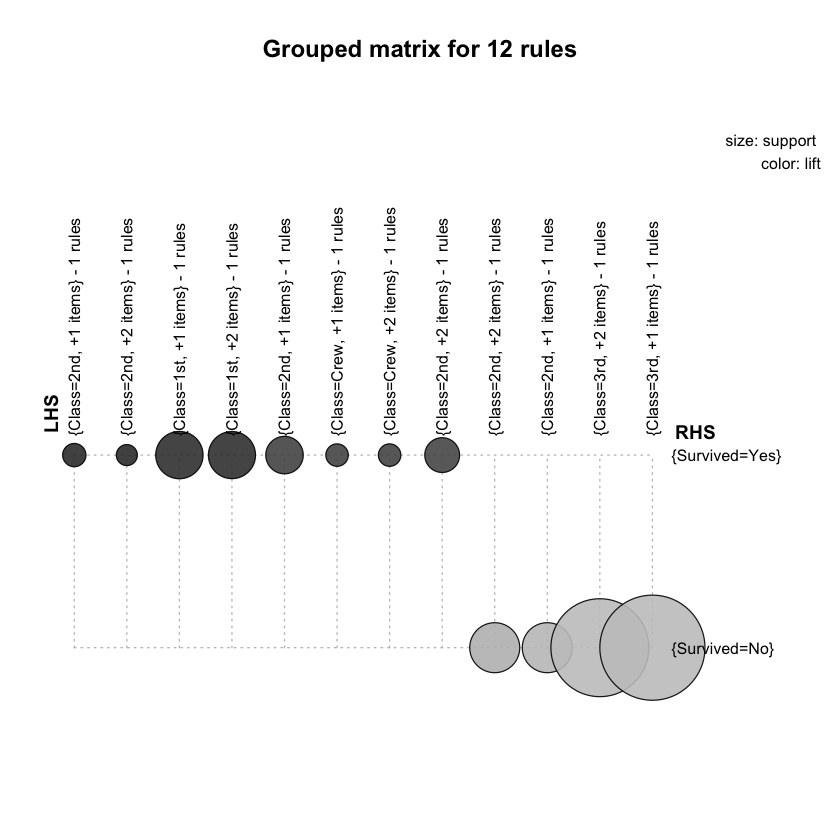

In [9]:
# An extended example using titanic data
# http://www.rdatamining.com/examples/association-rules 
load("ICA5-PartA/titanic2.raw.rdata")
rules <- apriori(titanic.raw,parameter = list(minlen=2, supp=0.005, conf=0.8), appearance = list(rhs=c("Survived=No", "Survived=Yes"), default="lhs"), control = list(verbose=F))
rules.sorted <- sort(rules, by="lift")
plot(rules.sorted, method="grouped")
inspect(rules.sorted, n=10)